# **Visualización**
# AE02. Matplotlib Heatmap y Dispersion

## <font color='blue'>Tablas de contingencia</font>

El método `pd.crosstab` nos permitirá realizar tablas de contingencia pasando como argumentos las series o arreglos donde tendremos nuestros datos categóricos. Por defecto, realizará el conteo de la co-ocurrencia de las variables categóricas, pero se pueden utilizar otras funciones de agregación
```python
pd.crosstab(serie1, serie2)
```

[Documentación crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)

Ejemplo en el cual se va a guardar una tabla de contingencia en la variable `contigency`:



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
%matplotlib inline

In [ ]:
var1 = ['a', 'a', 'c', 'c', 'b', 'b', 'a', 'a', 'c', 'b']
var2 = ['d', 'e', 'f', 'd', 'e', 'f', 'd', 'f', 'e', 'e']

contingency = pd.crosstab(pd.Series(var1), #es en el entorno de pandas
                          pd.Series(var2),
                          rownames=["var1"],
                          colnames=["var2"])
contingency

var2,d,e,f
var1,,,
a,2,1,1
b,0,2,1
c,1,1,1


# <font color='blue'>Mapas de calor (Heatmap)</font>

Una forma de visualizar tablas (como la anterior), corresponde a un mapa de calor. Esta visualización utiliza la intensidad de color para codificar los valores existentes en las tablas. En este caso, para poder realizar un mapa de calor utilizando matplotlib necesitamos invocar el método `plt.pcolormesh()`. Este recibe como argumento un arreglo bidimensional y nos devuelve un objeto artista, relacionado a nuestro mapa de calor.

[Documentación pcolormesh](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html)


In [ ]:
print(plt.style.available) #Estilos figura disponibles

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<font color="green">Para más información respecto a los estilos de colores de heatmap, ir a [colormaps styles](https://matplotlib.org/stable/tutorials/colors/colormaps.html) </font>

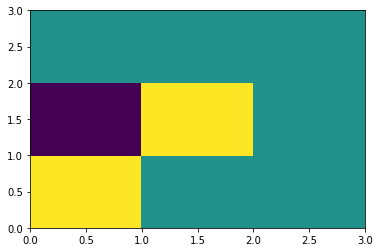

In [ ]:
z = contingency.values # Obtenemos una representación matricial de la matriz de contingencia
heatmap = plt.pcolormesh(z) # Generamos el mapa de calor y guardamos el artista en la variable heatmap ##Solo a lps valores de contingency

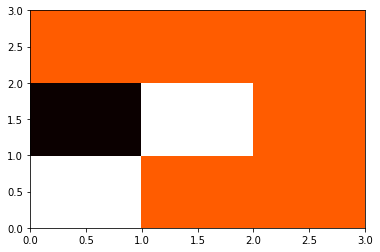

In [ ]:
z = contingency.values # Obtenemos una representación matricial de la matriz de contingencia
heatmap = plt.pcolormesh(z, cmap="hot") #usando un nuevo estilo

Utilizaremos ahora el método `plt.colorbar` para añadir la barra de color a nuestro mapa de calor. Con esto podremos añadir la referencia para la escala de color, asociada a los valores pertenecientes a las tablas. Este método recibe el artista asociado al mapa de calor para extraer los valores de color y asociarlos en la barra.

[Documentación colorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.colorbar.html?highlight=colorbar#matplotlib.pyplot.colorbar)


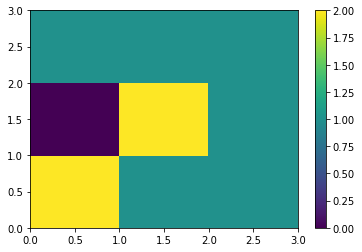

In [ ]:
heatmap = plt.pcolormesh(z) #Generamos el heatmap
cbar = plt.colorbar(heatmap) # Añadimos la barra de color #Aun sin formato de color del heatmap

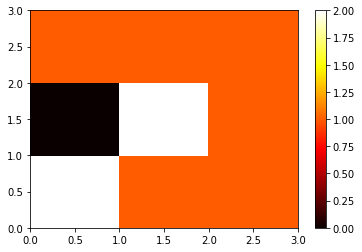

In [ ]:
heatmap = plt.pcolormesh(z, cmap="hot") #usando un nuevo estilo
cbar = plt.colorbar(heatmap)

Aparte de añadir la barra de color, podemos añadir a los ejes, los valores que hacen referencia cada una de las coordenadas. En este caso, en el eje X vamos a tener las valores correspondientes a las columnas (d, e, f), y en el eje Y los valores relacionados a las filas (a, b, c). Para esto utilizamos el método visto en los gráficos de barras `plt.xticks` y `plt.yticks`

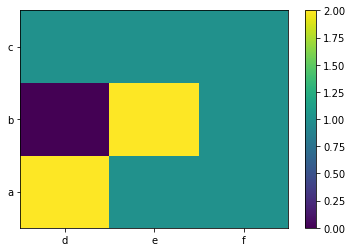

In [ ]:
heatmap = plt.pcolormesh(z)
cbar = plt.colorbar(heatmap)
plt.xticks([0.5, 1.5, 2.5], ["d", "e", "f"]) #horizontal, primero la posición, segundo los valores a reemplazar
plt.yticks([0.5, 1.5, 2.5], ["a", "b", "c"]) #vertical
plt.show()

Podemos añadir información, podemos utilizar el método `plt.text()`, el cual nos permitirá escribir texto en el heatmap. Este recibe 3 parámetros principales: coordenadas (X, Y) y el texto a pintar. En este caso, el texto lo vamos a sacar de la matrix `z[i, j]` (los valores obtenidos de la tabla de contingencia). Para poder pintar necesitaremos de los dos ciclos for, principalmente para escribir en los 9 cuadrados de los mapas de calor. Además de esto, añadiremos los títulos para el gráfico y los ejes X e Y. 

[Documentación plt.text](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html?highlight=pyplot%20text#matplotlib.pyplot.text)


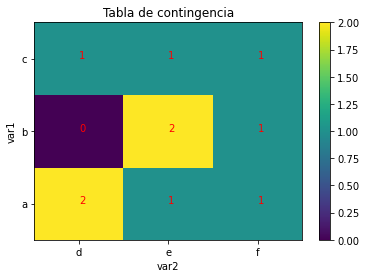

In [ ]:
heatmap = plt.pcolormesh(z)
cbar = plt.colorbar(heatmap)
plt.xticks([0.5, 1.5, 2.5], ["d", "e", "f"])
plt.yticks([0.5, 1.5, 2.5], ["a", "b", "c"])
for i in range(3):
    for j in range(3):
        text = plt.text(j + 0.5, i + 0.5, z[i, j], color="red") #escribe en la mitad del cuadrado la frecuencia de cada cuadrado en color rojo
plt.title("Tabla de contingencia")
plt.ylabel("var1")
plt.xlabel("var2")
plt.show()

# <font color='blue'>Manejo de marcadores y diagramas de dispersión</font>

Para poder ver como varían los distintos posibles estilos de marcadores, utilizaremos un set de datos conocido. Este corresponde al set de datos de la flor de iris.

[Documentación Estilos de Líneas y marcadores](https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html)


In [ ]:
# Montamos nuestro drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#iris_path = "../Archivos/VD03.csv"
#iris_path = "/content/drive/MyDrive/Colab Python/03. Análisis Exploratorio y Estadística/Archivos/VD03.csv"
iris_path = "/content/drive/MyDrive/Colab_Python/03. Análisis Exploratorio y Estadística/Archivos/VD03.csv"
iris_df = pd.read_csv(iris_path)
iris_df.drop(["Id"],inplace=True,axis="columns")
iris_df.sample(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
45,4.8,3.0,1.4,0.3,Iris-setosa
46,5.1,3.8,1.6,0.2,Iris-setosa


Guardaremos las columnas numéricas en distintas variables

In [ ]:
sl = iris_df['SepalLengthCm'].values #sl Sepal Length
sw = iris_df['SepalWidthCm'].values #sw Sepal Width
pl = iris_df['PetalLengthCm'].values #pl Petal Length
pw = iris_df['PetalWidthCm'].values #pw Petal Width

Luego graficaremos el comportamiento de una de estas utilizando el método `plt.plot`. Al pasar solo el eje X, este lo interpretará, y graficará los valores como una serie desde el índice $0$, hasta `len(columna)`.

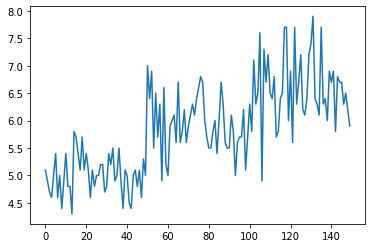

In [ ]:
plt.plot(sl) # Por defecto esto no generara un diagrama de linea ##x-axis va de 0 a n-1
plt.show()

Si después de pasar los datos, agregamos un estilo definidos en la documentación (ejemplo: '--'), vamos a tener diagrama de línea punteado

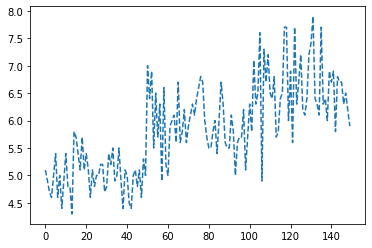

In [ ]:
plt.plot(sl, "--") #cambia el tipo de línea
plt.show()

Ejemplo de otro estilo, punto y línea (".-"):

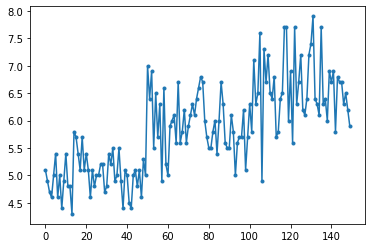

In [ ]:
plt.plot(sl, ".-")
plt.show()

Ahora si graficamos dos variables sin especificar el estilo vamos a obtener algo bastante interesante:

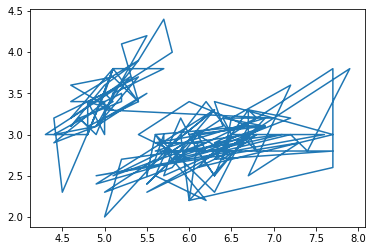

In [ ]:
plt.plot(sl, sw) #gráfico sin sentido, genera un scatterplot unidos por una línea
plt.show()

Para evitar esto, tenemos que definir nuevamente un estilo de marcador, como estamos en análisis bivariado, podemos utilizar un ...

# <font color='blue'>Diagrama de dispersión</font>
Utilizando el método `plt.plot` y definiendo como tercer argumento un estilo de marcador podemos generar nuestros diagramas de dispersión y ver cómo se comportan una variable con respecto a otra.

[Marcadores](https://matplotlib.org/3.3.0/api/markers_api.html)


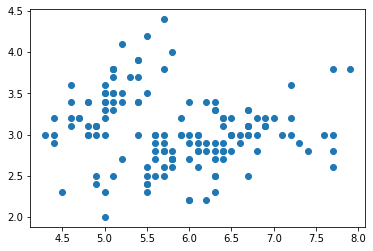

In [ ]:
plt.plot(sl, sw, 'o') # 'o' es igual a decir un círculo como marcador, ##'o' es para scatter 
plt.show()

Alternativamente podemos utilizar el método `plt.scatter()`:

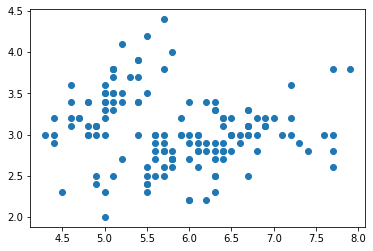

In [ ]:
plt.scatter(sl, sw) #idem a usar .plot con la opción 'o'
plt.show()

Podemos añadir color utilizando el parámetro color:

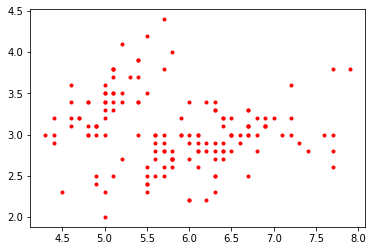

In [ ]:
plt.plot(sl, sw, '.', color="red")
plt.show()

O en su defecto, al principio del marcador la inicial del color, seguido por el marcador (en este caso "ro" = "red points")

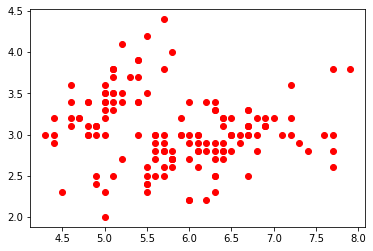

In [ ]:
plt.plot(sl, sw, 'ro')
plt.show()

Si aplicamos al parámetro `alpha`, podemos darle transparencia a los puntos y observar, de mejor forma, el potencial solpamiento que tienen.

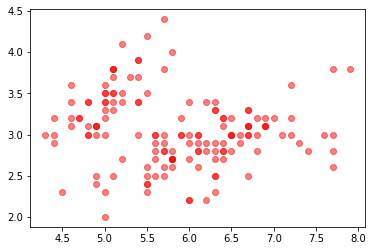

In [ ]:
plt.plot(sl, sw, 'ro', alpha=0.5) #alpha - grado transparencia de los puntos (entre 0 y 1)
plt.show()

un último ejemplo: diamantes rojos

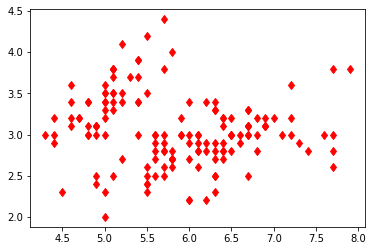

In [ ]:
plt.plot(sl, sw,'rd')
plt.show()

# <font color='blue'>Matriz de correlación</font>

Siguiendo con el análisis bivariado, podemos analizar la correlación existente entre variables. Esta correlación nos dará las dependencias lineales entre pares de variables. Para esto podemos programar nuestra propia función la cual compute lo siguiente:

$$ \rho_{X,Y} = \frac{cov(X,Y)}{\sigma_X\sigma_Y}$$ 
donde
$$ cov(X,Y) = \frac{\sum (X-\bar{X})(Y-\bar{Y})}{N}$$

es la Covarianza de $X$ e $Y$, y $\sigma_X$ y $\sigma_Y$ correspondena las desviaciones estándas de las variables.

Entonces, la matriz de correlación va a ser una matriz simétrica, donde cada casilla consiste en la correlación de los posibles pares de variables dentro de nuestro set de datos. En este caso, tendríamos una matriz de $4x4$ si es que tomamos como ejemplo el set de datos de iris. Generaremos una matriz con Numpy inicializada en ceros.


<font color="green">Correlación: grado de asociación lineal entre dos variables. Este indicador toma valores entre -1 y 1, donde valores cercanos a -1 indican una asociación negativa, mientras que para valores cercanos a 1 xiste una asociación positiva. No confundir *correlación* con *causalidad*, ya que es posible tener relación no lineal entre dos variables (con correlación nula). <br> 
Para interpretar el coeficiente de correlación utilizamos la siguiente escala:<font>

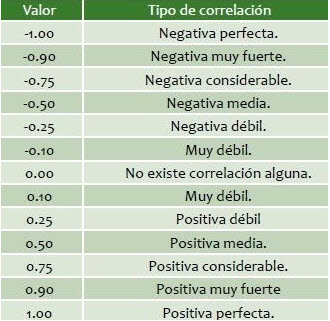

In [ ]:
corr = np.zeros((4,4)) #matriz 4x4 de ceros
corr

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Luego, definiremos la función de correlación el cual va a recibir dos arreglos de Numpy, y luego computamos las fórmulas que mencionamos anteriormente. Además, como la matriz es simétrica solo vamos a llenar la diagonal superior de dicha matriz. Finalmente imprimimos la matriz.

In [ ]:
def correlation(X,Y): #Se define la función de correlación
    cov = np.sum((X - np.mean(X)) * (Y - np.mean(Y))) * 1/(len(Y))
    correlation_value = cov / (np.std(X) * np.std(Y))
    return correlation_value

corr[0,0] = correlation(sl, sl) #se calcula para dos array
corr[0,1] = correlation(sl, sw)
corr[0,2] = correlation(sl, pl)
corr[0,3] = correlation(sl, pw)

corr[1,1] = correlation(sw, sw)
corr[1,2] = correlation(sw, pl)
corr[1,3] = correlation(sw, pw)

corr[2,2] = correlation(pl, pl)
corr[2,3] = correlation(pl, pw)

corr[3,3] = correlation(pw, pw)
corr

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [ 0.        ,  1.        , -0.4205161 , -0.35654409],
       [ 0.        ,  0.        ,  1.        ,  0.9627571 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

Aprovechemos los mapas de calor y mostremos la matriz de correlación utilizando esta representación

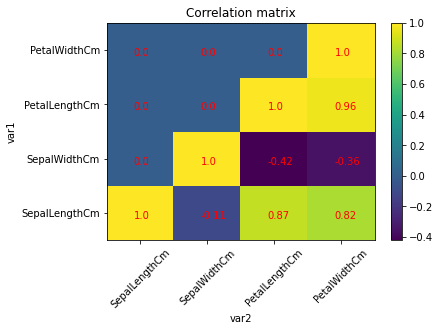

In [ ]:
heatmap = plt.pcolormesh(corr)
cbar = plt.colorbar(heatmap)

columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
plt.xticks([0.5, 1.5, 2.5, 3.5], columns, rotation=45)
plt.yticks([0.5, 1.5, 2.5, 3.5], columns)
for i in range(4):
    for j in range(4):
        text = plt.text(j + 0.4, i + 0.4, corr[i, j].round(2), color="red",) #inserta texto con la correlación entre las variables para cada combinación de ellas
plt.title("Correlation matrix")
plt.ylabel("var1")
plt.xlabel("var2")
plt.show()

Alternativamente y de forma mucho más sencilla, si tenemos un DataFrame podemos utilizar el método `.corr()` para obtener un nuevo DataFrame. Este DataFrame va a tener la matriz de correlación:

In [ ]:
iris_df.corr() #Otro comando simple para obtener la correlación .corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [ ]:
corr = iris_df.corr().values #solo valores
corr

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

Luego podemos graficar utilizando un heatmap

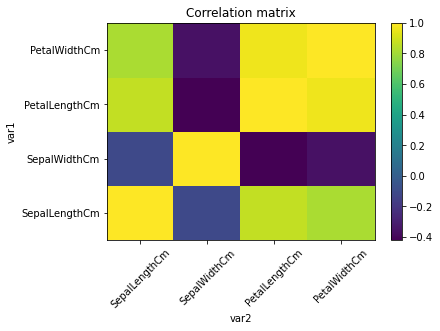

In [ ]:
heatmap = plt.pcolormesh(corr) #heatmap
cbar = plt.colorbar(heatmap) #indicador de color dell heatmap

columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"] #se inserta como nombre de xy_axes
plt.xticks([0.5, 1.5, 2.5, 3.5], columns, rotation=45) #xaxis horizontal rota su eje en 45 grados
plt.yticks([0.5, 1.5, 2.5, 3.5], columns) #yaxis vertical
plt.title("Correlation matrix")
plt.ylabel("var1")
plt.xlabel("var2")
plt.show()

Añadimos títulos, nombres de variables y texto a cada casilla del mapa de calor

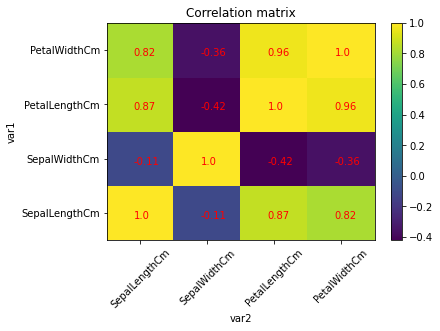

In [ ]:
heatmap = plt.pcolormesh(corr)
cbar = plt.colorbar(heatmap)

columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
plt.xticks([0.5, 1.5, 2.5, 3.5], columns, rotation=45) 
plt.yticks([0.5, 1.5, 2.5, 3.5], columns)
for i in range(4):
    for j in range(4):
        text = plt.text(j + 0.4, i + 0.4, corr[i, j].round(2), color="red",) #inserta valor de la correlación
plt.title("Correlation matrix")
plt.ylabel("var1")
plt.xlabel("var2")
plt.show()

# <font color='blue'>Guardar la figura</font>

Para poder guardar una figura, podemos utilizar el método `plt.savefig()`. Este como primer argumento recibirá el nombre del archivo que nosotros queremos guardar. En este caso, vamos a guardar la matriz de correlación generada en el archivo `"Correlation_matrix.png"`


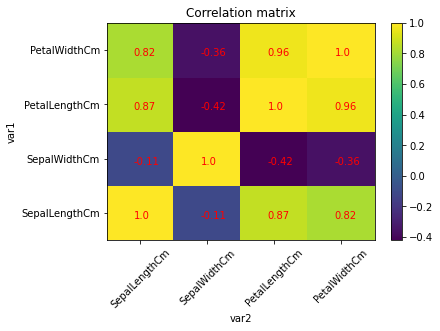

In [ ]:
heatmap = plt.pcolormesh(corr)
cbar = plt.colorbar(heatmap)

columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
plt.xticks([0.5, 1.5, 2.5, 3.5], columns, rotation=45)
plt.yticks([0.5, 1.5, 2.5, 3.5], columns)
for i in range(4):
    for j in range(4):
        text = plt.text(j + 0.4, i + 0.4, corr[i, j].round(2), color="red",)
plt.title("Correlation matrix")
plt.ylabel("var1")
plt.xlabel("var2")
plt.savefig("Correlation_matrix.png") #.savefig("file_name") guarda la imagen en el directorio raíz  
plt.show()

Para aumentar la Resolución de la figura podemos utilizar el parámetro `dpi`, el cual hace referencia a "Dots per Inch" o Puntos por Pulgada. Mientras más alto sea este número, mayor va a ser la resolución de salida para la imagen.

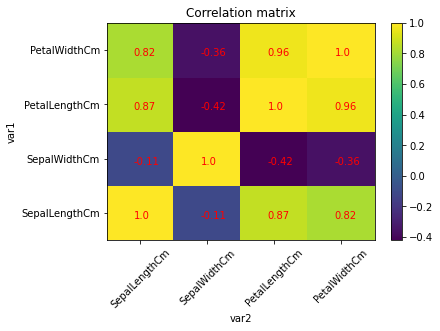

In [ ]:
heatmap = plt.pcolormesh(corr)
cbar = plt.colorbar(heatmap)

columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
plt.xticks([0.5, 1.5, 2.5, 3.5], columns, rotation=45)
plt.yticks([0.5, 1.5, 2.5, 3.5], columns)
for i in range(4):
    for j in range(4):
        text = plt.text(j + 0.4, i + 0.4, corr[i, j].round(2), color="red",)
plt.title("Correlation matrix")
plt.ylabel("var1")
plt.xlabel("var2")
plt.savefig("Correlation_matrix2.jpg", dpi=300) #.savefig() incluye la opción dpi
plt.show()

## <font color='green'>Actividad 1:</font>

Utilizaremos una base de datos especificamente: Los pingüinos de Palmer:

<center><img src="https://drive.google.com/uc?id=1gCG9wP4iAKh-0bNX-uQB9X6K5nlTnDgG" alt="drawing" width=600px/></center>

El set de datos de los pingüinos, específicamente “Palmer Penguins”, corresponde a un set de datos libre de uso. La idea es presentar una alternativa a un set de datos de similares características: El set de datos de Iris. En este caso, se tomaron diferentes medidas para 344 pingüinos en el archipiélago de Palmer en la Antártica. Las medidas que se tomaron fueron: “Bill Length”, “Bill Depth”, “Flipper Length” y “Body Mass” .
<center><img src="https://drive.google.com/uc?id=1DNeukLYfpfYWgz1r7XBEL_nV1905ltdM" alt="drawing" width=500px/><img src="https://drive.google.com/uc?id=1y5xWqxYDgU_FDm8WAJvXuIlFOhOHgC15" alt="drawing" width=600px/></center>

1.- Obtener la matriz de correlación y graficarla

2.- Graficar utilizando diagramas de dispersión pares de variables con: Alta Correlación, Nula Correlación y Correlación Negativa

3.- Generar tres histogramas para las posibles variables que existen en el set de datos

4.- Generar un gráfico de barras con la cantidad de pingüinos en cada isla

5.- Generar un gráfico de torta con la cantidad de pingüinos según especie

6.- Generar una tabla de contingencia con la cantidad de según especies e islas, y luego graficarlas



**Nota:** Para el punto 4, una pequeña ayuda puede ser la función: `np.unique(x, return_counts=True)` 

[Documentación np.unique](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)



In [ ]:
# Tu código aquí ...

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# penguins_df = pd.read_csv("../Archivos/VD02.csv").dropna()
penguins_df = pd.read_csv("/content/drive/MyDrive/Colab_Python/03. Análisis Exploratorio y Estadística/Archivos/VD02.csv").dropna() #leer archivo
#penguins_df = pd.read_csv("/content/drive/MyDrive/Colab Python/03. Análisis Exploratorio y Estadística/Archivos/VD02.csv").dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


1.- Obtener la matriz de correlación y graficarla

In [ ]:
#correlation matrix
penguins_df.corr() #correlación

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


2. Graficar utilizando diagramas de dispersión pares de variables con: Alta Correlación, Nula Correlación y Correlación Negativa

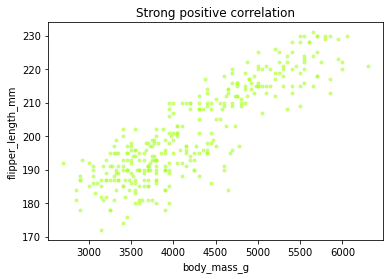

In [ ]:
#scatter plots
plt.plot(penguins_df['body_mass_g'], penguins_df['flipper_length_mm'], '.', alpha=0.55, color="greenyellow")
plt.xlabel("body_mass_g")
plt.ylabel("flipper_length_mm")
plt.title("Strong positive correlation")
plt.show()

<font color = "green">Si la tendencia general es que los puntos suban a la derecha de la gráfica, entonces decimos que hay una correlación positiva entre las dos variables medidas</font>

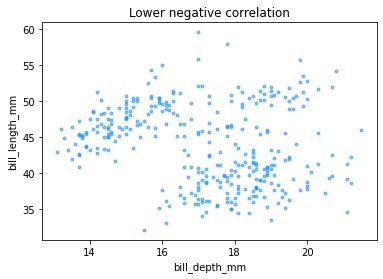

In [ ]:
plt.plot(penguins_df['bill_depth_mm'], penguins_df['bill_length_mm'], '.', alpha=0.55, color="dodgerblue")
plt.xlabel("bill_depth_mm")
plt.ylabel("bill_length_mm")
plt.title("Lower negative correlation")
plt.show()

<font color = "green">La correlación nula o negativa se da cuando no hay dependencia de ningún tipo entre las variables. En este caso se dice que las variables son incorreladas y la nube de puntos estan relativamente disperso en todo el grafico </font>

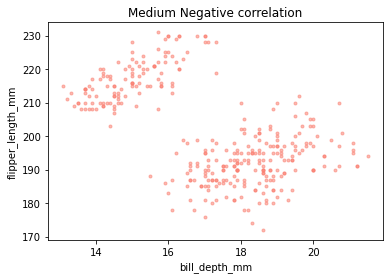

In [ ]:
plt.plot(penguins_df['bill_depth_mm'], penguins_df['flipper_length_mm'], '.', alpha=0.55, color="salmon")
plt.xlabel("bill_depth_mm")
plt.ylabel("flipper_length_mm")
plt.title("Medium Negative correlation")
plt.show()

<font color = "green"> Si los puntos caen a la izquierda de la gráfica, decimos que hay una correlación negativa <font> 

3.- Generar tres histogramas para las posibles variables que existen en el set de datos

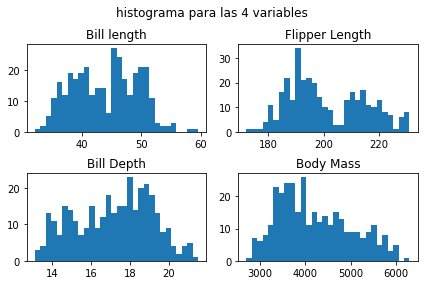

In [ ]:
#Histogramas
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(penguins_df['bill_length_mm'],bins=30)
axs[0, 0].set_title("Bill length")

axs[1, 0].hist(penguins_df['bill_depth_mm'],bins=30)
axs[1, 0].set_title('Bill Depth')

axs[0, 1].hist(penguins_df['flipper_length_mm'],bins=30)
axs[0, 1].set_title('Flipper Length')

axs[1, 1].hist(penguins_df['body_mass_g'],bins=30)
axs[1, 1].set_title('Body Mass')

fig.suptitle('histograma para las 4 variables') 
fig.tight_layout()
fig.subplots_adjust(top=0.85) #titulo más arriba

fig.show()

 4. Generar un gráfico de barras con la cantidad de pingüinos en cada isla

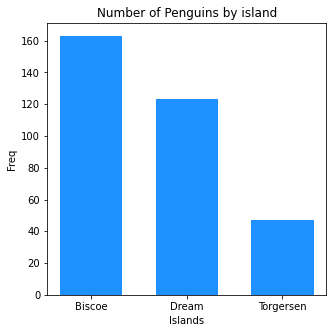

In [ ]:
isl_cnt = np.unique(penguins_df['island'], return_counts=True) #count the frequency by cualitative variable

fig = plt.figure(figsize = (5, 5))
#  Bar plot
plt.bar(isl_cnt[0], isl_cnt[1], width = 0.65, color="dodgerblue")
plt.xlabel("Islands")
plt.ylabel("Freq")
plt.title("Number of Penguins by island")
plt.show()

5.- Generar un gráfico de torta con la cantidad de pingüinos según especie

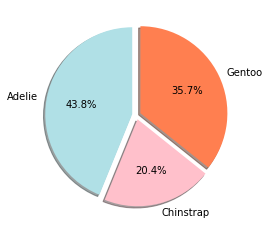

In [ ]:
species = np.unique(penguins_df['species'], return_counts=True)
colors = ['powderblue','pink','coral']
explode = [0.05, 0.05, 0.05]
plt.pie(species[1].tolist(), labels=species[0].tolist(), autopct='%.1f%%',colors=colors, shadow='True', explode=explode, startangle=90)
plt.show()

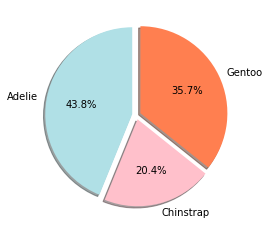

In [ ]:
#otra solución
especies = penguins_df.groupby('species')['island'].count() #cuenta la cantidad de cada especie 
labels = penguins_df['species'].unique().tolist() #especies 
labels.sort()
colors = ['powderblue','pink','coral']
explode = [0.05, 0.05, 0.05]
plt.pie(especies, labels=labels, autopct='%.1f%%',colors=colors, shadow='True', explode=explode, startangle=90)
plt.show()

6.- Generar una tabla de contingencia con la cantidad de según especies e islas, y luego graficarlas

In [ ]:
cantspecies = penguins_df['species']
cantisland = penguins_df['island']

contingency = pd.crosstab(pd.Series(cantisland),
                          pd.Series(cantspecies),
                          rownames=["island"],
                          colnames=["species"])
contingency

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,119
Dream,55,68,0
Torgersen,47,0,0


In [ ]:
z = contingency.values
z

array([[ 44,   0, 119],
       [ 55,  68,   0],
       [ 47,   0,   0]])

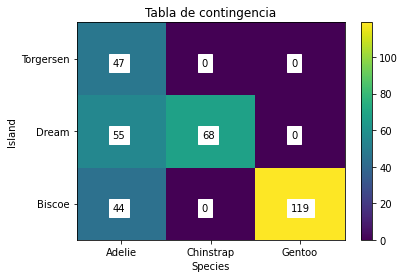

In [ ]:
heatmap = plt.pcolormesh(z)
cbar = plt.colorbar(heatmap)
plt.xticks([0.5, 1.5, 2.5], ["Adelie", "Chinstrap", "Gentoo"])
plt.yticks([0.5, 1.5, 2.5], ["Biscoe", "Dream", "Torgersen"])
for i in range(3):
    for j in range(3):
        text = plt.text(j + 0.4, i + 0.4, z[i, j], color="black", fontweight='normal', backgroundcolor='white') #tiene fondo blanco
plt.title("Tabla de contingencia")
plt.xlabel("Species")
plt.ylabel("Island")
plt.show()

<font color='green'>Fin actividad 1</font>